In [6]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import datetime

In [32]:
df_GDP=pd.read_csv('GDP.csv')
df_M1US=pd.read_csv('M1US.csv')
df_M1V=pd.read_csv('M1V.csv')
df_M2US=pd.read_csv('M2US.csv')
df_M2V=pd.read_csv('M2V.csv')
df_M3US=pd.read_csv('M3US.csv')

df_M1Y=pd.read_csv('Marketyeld1.csv')
df_M1Y.drop(df_M1Y.loc[df_M1Y['DGS1']=='.'].index, inplace=True)
df_M1Y['DGS1']=df_M1Y['DGS1'].astype('float')
def to_datetime(df):
    df.DATE=pd.to_datetime(df.DATE)
    return df

df_GDP=to_datetime(df_GDP)
df_M1US=to_datetime(df_M1US)
df_M1V=to_datetime(df_M1V)
df_M2US=to_datetime(df_M2US)
df_M2V=to_datetime(df_M2V)
df_M3US=to_datetime(df_M3US)
df_M1Y=to_datetime(df_M1Y)

df_dicts={
          "df_GDP":df_GDP,
          "df_M1US":df_M1US,
          "df_M1V":df_M1V,
          "df_M2US":df_M2US,
          "df_M2V":df_M2V,
          "df_M3US":df_M3US,
          "df_M1Y":df_M1Y
          }




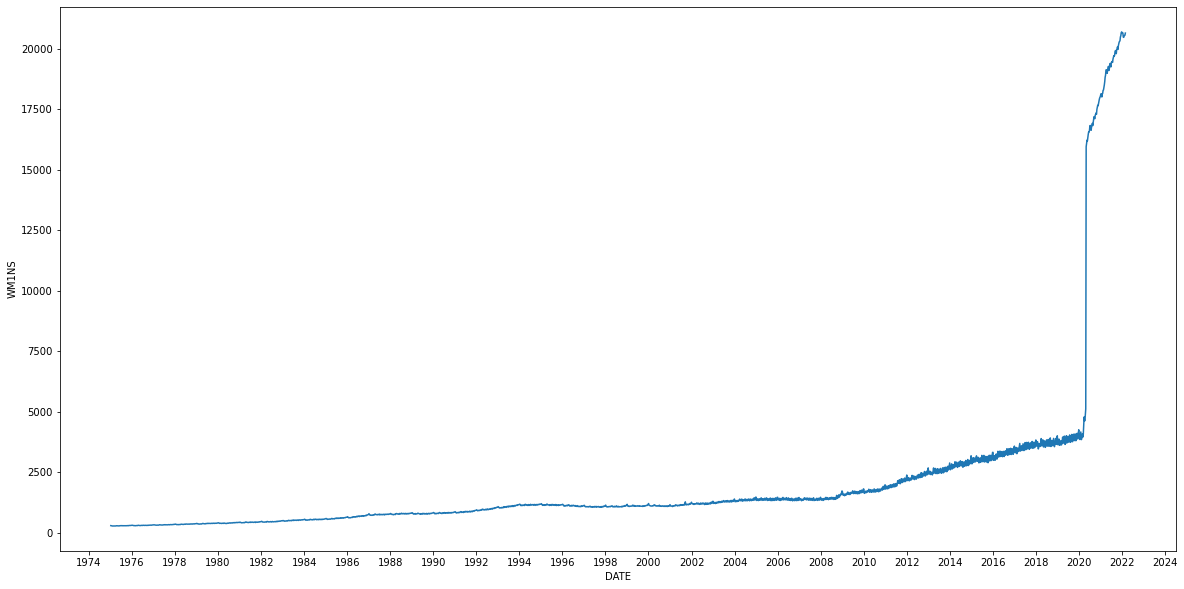

In [33]:
a=plt.figure(figsize=(20,10))
a=sns.lineplot(df_M1US.DATE,df_M1US.WM1NS)
a.xaxis.set_major_locator(mdates.YearLocator(base=2))
a.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


plt.show()

In [34]:
type(df_GDP.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
def filler(date_col,entity_col,entity):
    i=0
    date_col=date_col.to_list()
    entity_col=entity_col.to_list()

    for i in tqdm(range(0,len(date_col))):

        days_diff=date_col[i+1]-date_col[i]
        days_delta=days_diff.days
        value_delta=entity_col[i+1]-entity_col[i]
        value_delta_time=value_delta/days_delta
        for j in list(range(days_delta+1)):
            date_col.append(date_col[i]+datetime.timedelta(days=j))
            entity_col.append(entity_col[i]+j*value_delta_time)
    date_col1=pd.Series(date_col)
    entity_col1=pd.Series(entity_col)
    df=pd.concat([date_col1, entity_col1], axis=1)
    df=df.sort_values(by=0)
    df.reset_index(inplace=True,drop=True)
    entity=entity.replace('df_','')
    df.columns = ['date', entity]
    return df

df_dict={}
for key, value in df_dicts.items():
    df=df_dicts[key]
    if key== 'df_M1Y':
        df.drop(df.loc[df['DGS1']=='.'].index, inplace=True)
        df_M1Y['DGS1']=df_M1Y['DGS1'].astype('float')
    df_dict[key]=filler(df[df.columns[0]],df[df.columns[1]],key)






100%|██████████| 10707/10707 [00:00<00:00, 35106.67it/s]


In [37]:
for key, value in df_dict.items():
    if key=='df_GDP':
        big_df=df_dict[key]
        #big_df.set_index('date',inplace=True)
    else:
        dfs=df_dict[key]
        #dfs.set_index(dfs.columns[0],inplace=True)
        big_df=pd.merge(big_df, dfs, on="date")
big_df.drop_duplicates(subset=['date'],inplace=True)


big_df

,date,GDP,M1US,M1V,M2US,M2V,M3US,M1Y
0,1980-11-03,3035.289793,412.600000,7.377293,1595.200000,1.893370,1.596067e+12,14.040
18,1980-11-04,3036.796848,413.414286,7.379848,1596.057143,1.893957,1.596200e+12,14.065
19,1980-11-05,3038.303902,414.228571,7.382402,1596.914286,1.894543,1.596333e+12,14.090
22,1980-11-06,3039.810957,415.042857,7.384957,1597.771429,1.895130,1.596467e+12,14.150
25,1980-11-07,3041.318011,415.857143,7.387511,1598.628571,1.895717,1.596600e+12,13.610
...,...,...,...,...,...,...,...,...
150857,2021-09-27,23968.011913,19789.400000,1.184652,20925.300000,1.121565,2.114316e+13,0.090
150884,2021-09-28,23976.712685,19814.228571,1.184739,20950.028571,1.121674,2.114827e+13,0.090
150887,2021-09-29,23985.413457,19839.057143,1.184826,20974.757143,1.121783,2.115338e+13,0.090
150890,2021-09-30,23994.114228,19863.885714,1.184913,20999.485714,1.121891,2.115849e+13,0.090


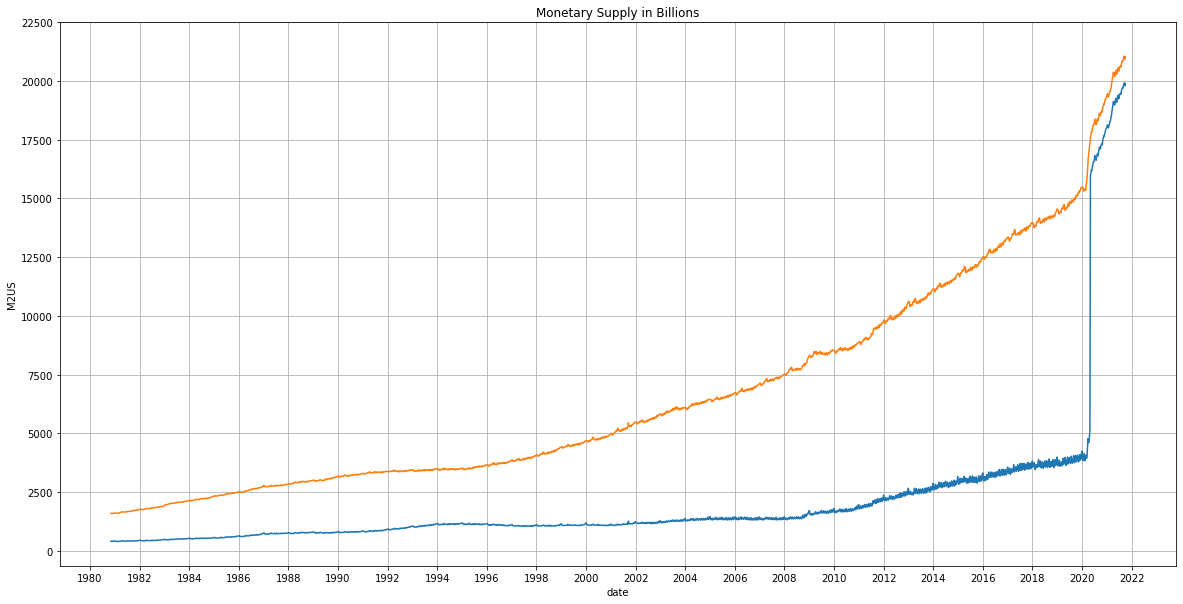

In [38]:
a = plt.figure(figsize=(20, 10))
a = sns.lineplot(big_df['date'], big_df['M1US'])
a = sns.lineplot(big_df['date'], big_df['M2US'])

a.xaxis.set_major_locator(mdates.YearLocator(base=2))
a.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
a.yaxis.set_ticks(np.arange(0, 25000, 2500))
plt.title('Monetary Supply in Billions')
plt.grid()
plt.show()

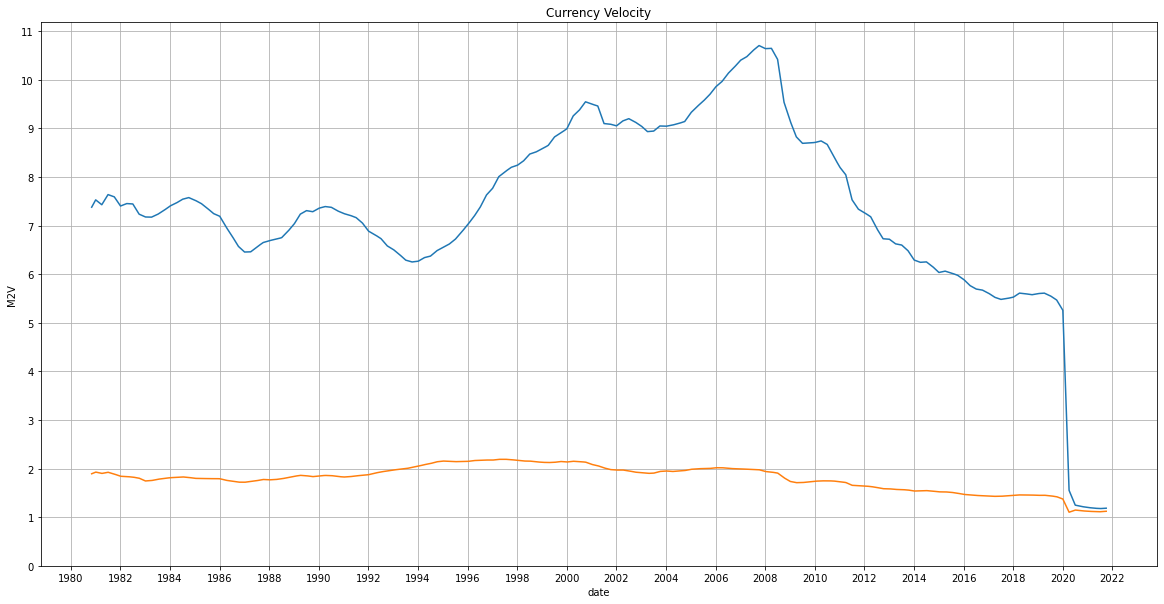

In [39]:
b = plt.figure(figsize=(20, 10))
b = sns.lineplot(big_df['date'], big_df['M1V'])
b = sns.lineplot(big_df['date'], big_df['M2V'])

b.xaxis.set_major_locator(mdates.YearLocator(base=2))
b.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
b.yaxis.set_ticks(np.arange(0, 12))
plt.title('Currency Velocity')
plt.grid()

plt.show()

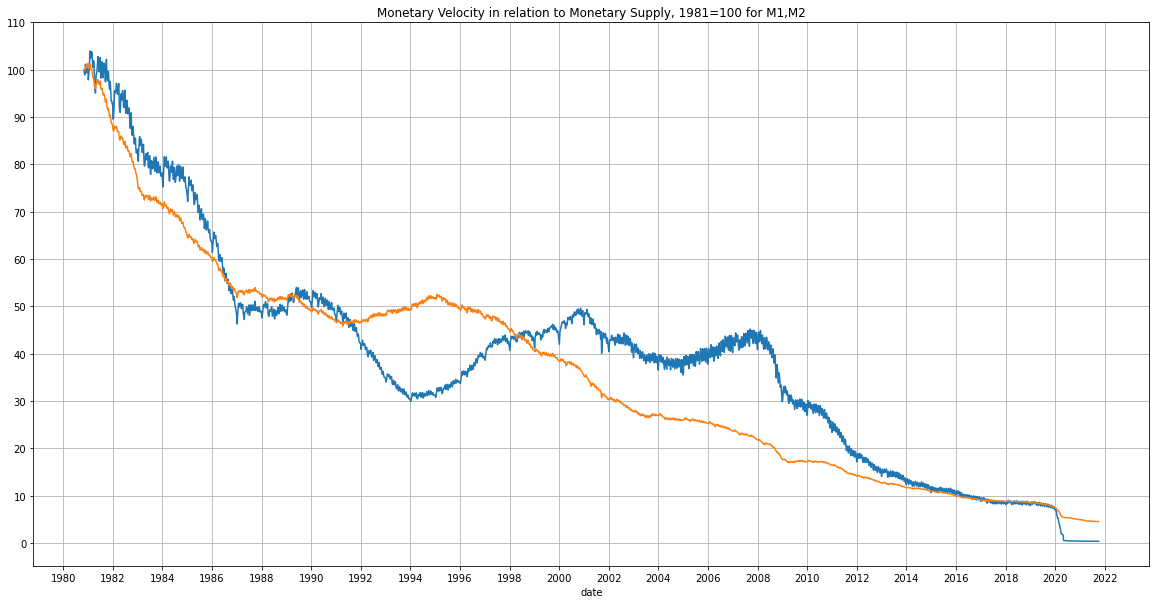

In [40]:
c = plt.figure(figsize=(20, 10))

multi=100/(big_df['M1V'][0]/big_df['M1US'][0])
multi2=100/(big_df['M2V'][0]/big_df['M2US'][0])

c = sns.lineplot(big_df['date'], big_df['M1V']/big_df['M1US']*multi)
c = sns.lineplot(big_df['date'], big_df['M2V']/big_df['M2US']*multi2)

c.xaxis.set_major_locator(mdates.YearLocator(base=2))
c.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
c.yaxis.set_ticks(np.arange(0, 120, 10))
plt.title('Monetary Velocity in relation to Monetary Supply, 1981=100 for M1,M2')
plt.grid()

plt.show()

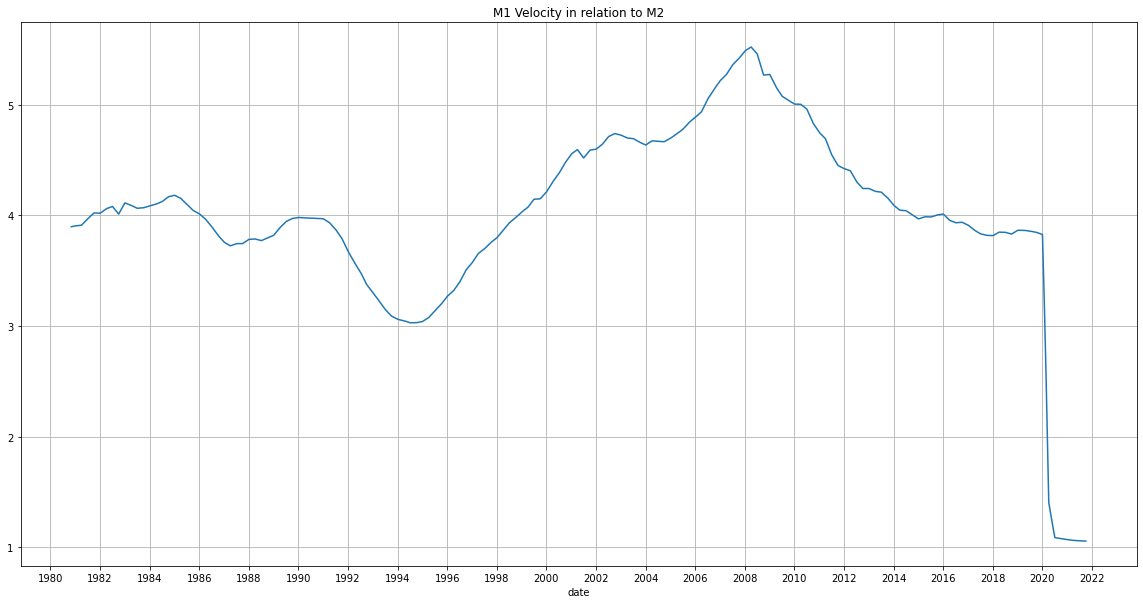

In [41]:
e = plt.figure(figsize=(20, 10))

multi=100/(big_df['M1V'][0]/big_df['M1US'][0])
multi2=100/(big_df['M2V'][0]/big_df['M2US'][0])

e = sns.lineplot(big_df['date'], big_df['M1V']/big_df['M2V'])

e.xaxis.set_major_locator(mdates.YearLocator(base=2))
e.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#e.yaxis.set_ticks(np.arange(0, 1700, 100))
plt.title('M1 Velocity in relation to M2')
plt.grid()
plt.show()

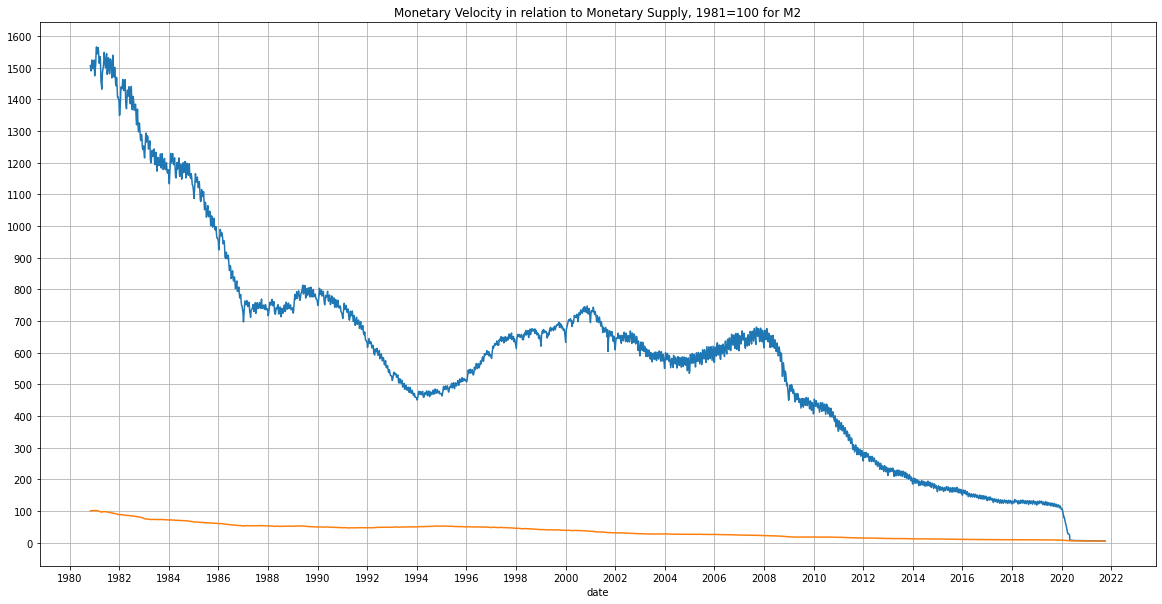

In [42]:
d = plt.figure(figsize=(20, 10))



d = sns.lineplot(big_df['date'], big_df['M1V']/big_df['M1US']*multi2)
d = sns.lineplot(big_df['date'], big_df['M2V']/big_df['M2US']*multi2)

d.xaxis.set_major_locator(mdates.YearLocator(base=2))
d.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
d.yaxis.set_ticks(np.arange(0, 1700, 100))
plt.title('Monetary Velocity in relation to Monetary Supply, 1981=100 for M2')
plt.grid()
plt.show()

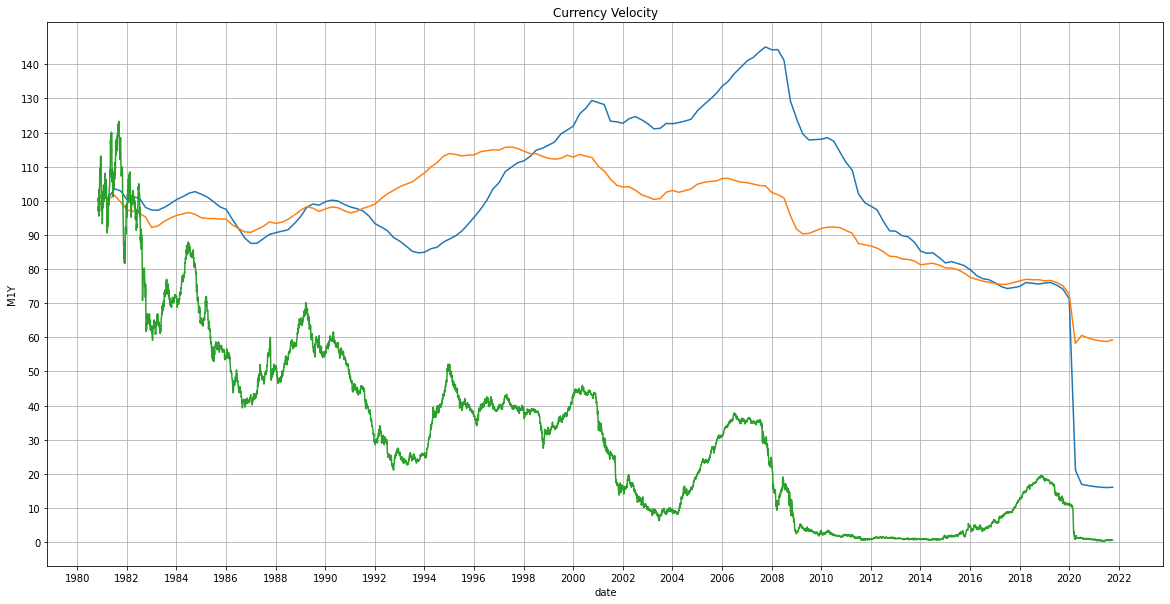

In [49]:
f = plt.figure(figsize=(20, 10))

multi1=100/(big_df['M1V'][0])
multi2=100/(big_df['M2V'][0])
multi3=100/(big_df['M1Y'][0])

f = sns.lineplot(big_df['date'], big_df['M1V']*multi1)
f = sns.lineplot(big_df['date'], big_df['M2V']*multi2)
f = sns.lineplot(big_df['date'], big_df['M1Y']*multi3)

f.xaxis.set_major_locator(mdates.YearLocator(base=2))
f.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.yaxis.set_ticks(np.arange(0, 150,10))
plt.title('Currency Velocity')
plt.grid()

plt.show()